In [1]:
import pandas as pd

In [2]:
# Load all sheets to check for structured data
xls = pd.ExcelFile('glass.xlsx')
xls.sheet_names

['Description', 'glass']

# 1. Exploratory Data Analysis (EDA)

In [3]:
# Load the "glass" sheet, which likely contains the structured dataset
df_glass = pd.read_excel('glass.xlsx', sheet_name="glass")

# Display basic information and the first few rows of the dataset
df_glass.info(), df_glass.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


(None,
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
 0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
 1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
 2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
 3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
 4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set style for plots
sns.set_style("whitegrid")

# 2. Data Visualization

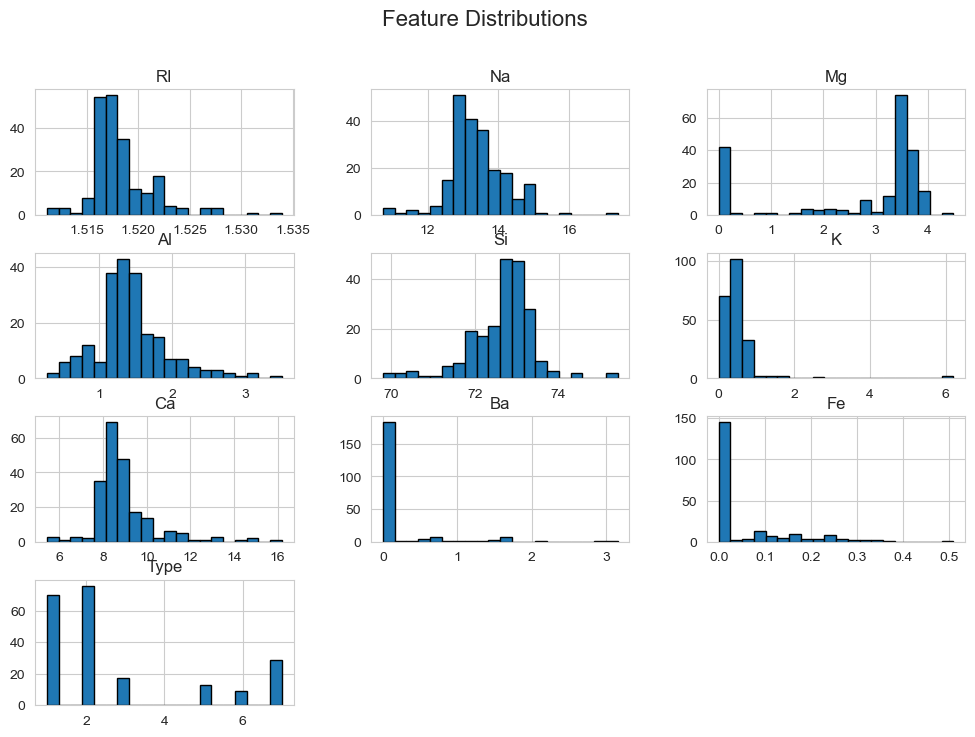

In [6]:
# Plot histograms for all numerical features
df_glass.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

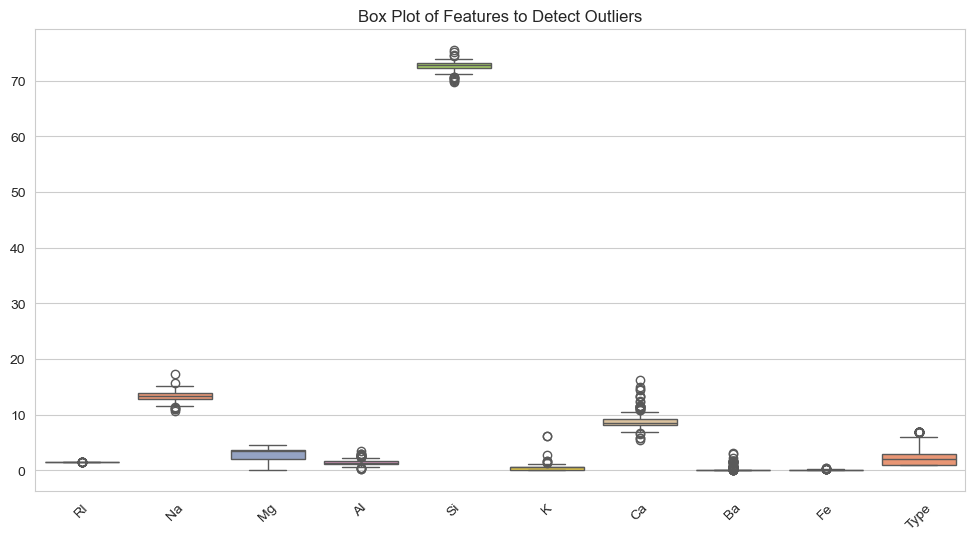

In [7]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_glass, palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot of Features to Detect Outliers")
plt.show()

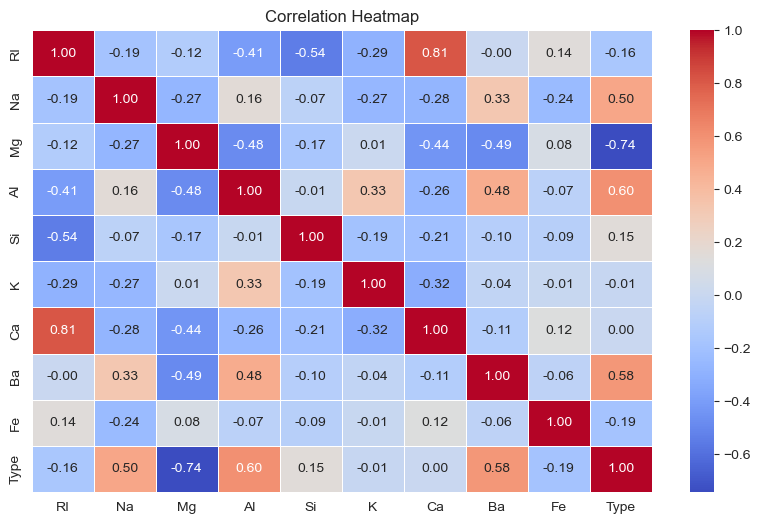

In [8]:
# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_glass.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 3. Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Feature Scaling using Standardization (Z-score normalization)
scaler = StandardScaler()
scaler

StandardScaler()

In [11]:
features = df_glass.drop(columns=["Type"])  # Exclude target variable
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [13]:
# Convert back to DataFrame for better readability
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [14]:
# Display first few rows of the scaled dataset
df_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# 4. Random Forest Model Implementation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Define features and target
X = df_scaled  # Scaled features
y = df_glass["Type"]  # Target variable
X,y

(           RI        Na        Mg        Al        Si         K        Ca  \
 0    0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
 1   -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
 2   -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
 3   -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
 4   -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   
 ..        ...       ...       ...       ...       ...       ...       ...   
 209 -0.704815  0.898681 -1.865511  2.881125 -0.052974 -0.640968  0.157088   
 210 -0.500178  1.856097 -1.865511  1.094342  0.529374 -0.763919 -0.392276   
 211  0.754046  1.168721 -1.865511  1.154570  0.995252 -0.763919 -0.364103   
 212 -0.612399  1.193270 -1.865511  0.993960  1.241133 -0.763919 -0.335931   
 213 -0.414363  1.009152 -1.865511  1.275028  0.917606 -0.763919 -0.237327   
 
            Ba        Fe  
 0   -0.352877 -0.586451  
 1   -0.

In [17]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test

(           RI        Na        Mg        Al        Si         K        Ca  \
 201 -0.605797 -1.789447 -1.865511 -0.511756  3.272880  3.385674 -0.018990   
 38   1.242534  0.984603  0.789048 -1.957244 -1.140023 -0.594861  0.431770   
 30  -0.226229 -0.930228  0.608372 -0.290918  0.555256  0.173582 -0.188025   
 48   1.275540 -0.242853  0.754303 -1.314805 -0.855320 -0.564123  0.748710   
 71   0.037818  0.284953  0.823794 -0.351146 -0.894143  0.066000 -0.448621   
 ..        ...       ...       ...       ...       ...       ...       ...   
 198 -1.008470  1.193270 -1.865511  2.439448  0.581138 -0.702443  0.086657   
 63   1.288742  0.935505  0.782099 -1.334881 -1.683548 -0.763919  0.516287   
 157  0.938879  0.763661  0.747354 -1.736405 -1.114141 -0.594861  0.488115   
 150 -0.566190 -0.328775  0.531931  0.632589 -0.221208  0.158213 -0.406362   
 178 -0.024893  1.291467 -0.308911  0.351521 -0.350618 -0.763919  0.213433   
 
            Ba        Fe  
 201 -0.352877 -0.586451  
 38  -0.

In [18]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred

array([7, 5, 2, 5, 1, 2, 2, 2, 1, 1, 3, 1, 7, 6, 1, 7, 7, 1, 1, 2, 1, 1,
       7, 2, 1, 3, 2, 6, 2, 1, 7, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 6],
      dtype=int64)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.813953488372093,
 array([[12,  1,  1,  0,  0,  0],
        [ 3, 11,  0,  0,  1,  0],
        [ 1,  0,  2,  0,  0,  0],
        [ 0,  1,  0,  2,  0,  0],
        [ 0,  0,  0,  0,  2,  0],
        [ 0,  0,  0,  0,  0,  6]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           1       0.75      0.86      0.80        14\n           2       0.85      0.73      0.79        15\n           3       0.67      0.67      0.67         3\n           5       1.00      0.67      0.80         3\n           6       0.67      1.00      0.80         2\n           7       1.00      1.00      1.00         6\n\n    accuracy                           0.81        43\n   macro avg       0.82      0.82      0.81        43\nweighted avg       0.83      0.81      0.81        43\n')

# 5. Bagging and Boosting Methods

In [21]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [22]:
# Bagging with Random Forest as base estimator
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), 
                                  n_estimators=10, random_state=42)
bagging_model

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [23]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [24]:
bagging_pred = bagging_model.predict(X_test)
bagging_pred

array([7, 5, 2, 5, 1, 2, 2, 2, 1, 1, 3, 1, 7, 6, 1, 7, 7, 1, 1, 2, 2, 1,
       7, 2, 1, 3, 2, 6, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 6],
      dtype=int64)

In [25]:
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_accuracy

0.7906976744186046

In [26]:
# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

C:\Users\Kruthika M\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [27]:
adaboost_pred = adaboost_model.predict(X_test)
adaboost_pred

array([2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 7, 6, 2, 7, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 6, 2, 1, 7, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 6],
      dtype=int64)

In [28]:
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_accuracy

0.5348837209302325

In [29]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [30]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [31]:
gb_pred = gb_model.predict(X_test)
gb_pred

array([7, 5, 2, 5, 1, 2, 2, 2, 1, 2, 3, 1, 7, 6, 2, 7, 7, 1, 1, 2, 1, 1,
       7, 2, 2, 3, 2, 6, 2, 1, 7, 1, 1, 2, 2, 2, 1, 1, 2, 3, 7, 2, 6],
      dtype=int64)

In [32]:
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_accuracy

0.813953488372093

In [33]:
# Compare Results
{
    "Random Forest Accuracy": accuracy,
    "Bagging Accuracy": bagging_accuracy,
    "AdaBoost Accuracy": adaboost_accuracy,
    "Gradient Boosting Accuracy": gb_accuracy
}


{'Random Forest Accuracy': 0.813953488372093,
 'Bagging Accuracy': 0.7906976744186046,
 'AdaBoost Accuracy': 0.5348837209302325,
 'Gradient Boosting Accuracy': 0.813953488372093}

# Additional Notes:
### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating)
Concept: Creates multiple independent models and averages their predictions to reduce variance.
How it works:

Random subsets of data are sampled with replacement (Bootstrap).
Each subset trains a weak learner (typically Decision Trees).
Final prediction is obtained by majority voting (classification) or averaging (regression).
Key Advantage: Reduces overfitting by decreasing variance.
Example Algorithm: Random Forest (a collection of decision trees trained using Bagging).
Boosting
Concept: Builds models sequentially, with each model learning from the errors of the previous one.
How it works:

Starts with a weak model.
In each step, misclassified samples are given higher weights.
A new model is trained to correct errors from the previous model.
Final prediction is made by weighted voting (classification) or weighted sum (regression).
Key Advantage: Reduces bias, making the model more accurate.
Example Algorithms:
AdaBoost (Adaptive Boosting)
Gradient Boosting
XGBoost (Extreme Gradient Boosting)

### 2. Explain how to handle imbalance in the data.

If some classes are much less frequent, the model might become biased towards the majority class.

Methods to Handle Imbalance

1. Resampling Techniques

Oversampling: Duplicate samples from the minority class (e.g., SMOTE – Synthetic Minority Over-sampling Technique).
Undersampling: Remove some samples from the majority class to balance the dataset.

2️. Class Weighing

Assign higher weights to minority class samples during training.
Many models (e.g., RandomForestClassifier(class_weight='balanced')) support this option.

3️. Anomaly Detection

If one class is very rare, treat it as an anomaly (use One-Class SVM or Isolation Forest).

4. Data Augmentation

Generate synthetic data using techniques like SMOTE or GANs (Generative Adversarial Networks).

5️. Choose the Right Metric

Instead of accuracy, use:
Precision & Recall (for imbalanced classification)
F1-score (balances Precision & Recall)
ROC-AUC Score (measures classification ability across thresholds)
